## **Sprint 3: H&M Personalized Fashion Recommendations**

### Part 2: Matrix Factorization

___
**Atoosa Rashid** 

[GitHub](https://github.com/atoosa-r/)

[LinkedIn](https://www.linkedin.com/in/atoosarashid/) 
___

### **Introduction**

In this data analysis, we explore H&M Group datasets, including transactions, customer information, and article details. H&M Group operates globally with 53 online markets and approximately 4850 stores. The objective is to uncover insights for developing effective product recommendations.

In this notebook we will be performing Matrix Factorization and providing further recommendations. 

**Step-by-Step Plan**
1. Data Preparation

2. Matrix Factorization
- Load the dataset into the Surprise library.
- Perform hyperparameter tuning with GridSearchCV.
- Train the FunkSVD model.

3. Making Predictions
- Predict scores for customers.
- Retrieve and display top recommendations.

4. Model Evaluation
- Calculate RMSE, MSE, MAE, and FCP.
- Assess model performance.

In [29]:
# Importing libraries: 

import numpy as np                 
import pandas as pd    
              
import matplotlib.pyplot as plt      
import matplotlib.image as mpimg      
import seaborn as sns         

from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cosine as cosine_distance

from surprise import Dataset
from surprise.reader import Reader
from surprise.prediction_algorithms.matrix_factorization import SVD as FunkSVD
from surprise.model_selection import GridSearchCV
from surprise import accuracy
from surprise.model_selection import train_test_split

import os
from IPython.display import display, Image

In [30]:
# Importing Dataframes:

articles_df=pd.read_csv("~/Desktop/cleaned_articles_df.csv") 

m_matrix=pd.read_csv("~/Desktop/melted_dataframe.csv")

R_df=pd.read_csv("~/Desktop/R_df.csv")

# Path to the images directory:

images_path = '~/Desktop/data/hm/images'

In [31]:
# Sanity check:

m_matrix.head(3)

,customer_id,article_id,score
0,0dbe2f2ceb2e205216589497f46228ab5b6eb8927032f4...,111565001,5.0
1,18cbcb477a05ec64929809693fcac49edd404571f7e667...,111565001,2.5
2,190ce2b4681d15e1b4e752aaefdf07d73cf3265d33e5de...,111565001,5.0


In [32]:
# Sanity check:

articles_df.head(3)

,article_id,prod_name,product_type_name,product_group_name,colour_group_name,department_name,index_group_name,section_name,garment_group_name,detail_desc,preprocessed_detail_desc
0,108775015,Strap top,Vest top,Garment Upper body,Black,Jersey Basic,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.,jersey top narrow shoulder straps
1,108775044,Strap top,Vest top,Garment Upper body,White,Jersey Basic,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.,jersey top narrow shoulder straps
2,108775051,Strap top (1),Vest top,Garment Upper body,Off White,Jersey Basic,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.,jersey top narrow shoulder straps


In [33]:
# Checking for nans:

m_matrix.isna().sum()

customer_id    0
article_id     0
score          0
dtype: int64

In [34]:
# Checking info: 

m_matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470191 entries, 0 to 470190
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   customer_id  470191 non-null  object 
 1   article_id   470191 non-null  int64  
 2   score        470191 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 10.8+ MB


In [35]:
# Sorting values based on the order below: 

mm_df = m_matrix.sort_values(by=['customer_id', 'article_id','score'])

In [36]:
# Sanity check on the new sorted order:

mm_df.head(10)

,customer_id,article_id,score
14559,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,794321007,5.0
1041,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,448509014,5.0
8336,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,719530003,5.0
9140,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,734592001,5.0
39368,0002cca4cc68601e894ab62839428e5f0696417fe0f9e8...,910601002,5.0
4371,00039306476aaf41a07fed942884f16b30abfa83a2a8be...,624486001,5.0
4290,0003e867a930d0d6842f923d6ba7c9b77aba33fe2a0fbf...,621381012,2.5
4660,0003e867a930d0d6842f923d6ba7c9b77aba33fe2a0fbf...,640021012,2.5
18792,0003e867a930d0d6842f923d6ba7c9b77aba33fe2a0fbf...,827487003,2.5
28968,0003e867a930d0d6842f923d6ba7c9b77aba33fe2a0fbf...,880017001,5.0


In [37]:
# Check:

mm_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 470191 entries, 14559 to 453014
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   customer_id  470191 non-null  object 
 1   article_id   470191 non-null  int64  
 2   score        470191 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 14.3+ MB


In [38]:
# Check: 

mm_df.value_counts('score', ascending=False)

score
5.000000    356805
2.500000     89914
1.666667     13941
3.333333      4220
1.250000      3081
1.000000       686
0.833333       424
3.750000       292
2.000000       276
0.714286        89
3.000000        86
0.625000        68
4.000000        50
0.555556        47
1.428571        45
1.111111        23
0.357143        17
1.875000        12
4.166667        10
0.294118         9
0.500000         8
3.125000         8
2.142857         7
0.333333         7
0.416667         7
1.071429         6
4.285714         5
0.384615         5
0.666667         4
2.222222         4
3.571429         3
0.250000         3
0.588235         3
0.200000         3
1.500000         2
4.375000         2
0.526316         2
0.454545         2
0.263158         2
2.857143         2
1.923077         2
0.217391         1
1.363636         1
2.272727         1
3.809524         1
3.888889         1
1.200000         1
0.400000         1
4.500000         1
2.083333         1
Name: count, dtype: int64

___
**Using the Surprise Library for Matrix Factorization**

**Step 1:** Load the Dataset from a DataFrame

We load our sorted Dataframe into a Surprise dataset. This dataset will be used to build and evaluate our recommendation models. The `Reader` class is used to specify the rating scale, which ranges from 0 to 5 in our case.

**Step 2:** Build the Full Training Set

We convert the loaded dataset into a full training set. This training set includes all the data from our original DataFrame and is structured in a way that Surprise's algorithms can use for training.

In [39]:
#Step 1:

my_dataset = Dataset.load_from_df(mm_df, Reader(rating_scale=(0, 5)))

#Step 2:

my_train_dataset = my_dataset.build_full_trainset()

In [40]:
#Sanity check :

my_train_dataset

The dataset has been successfully converted into a trainset object, which is now ready to be used for training our recommendation model in the Surprise library. We'll continue by first performing some hyperparameter tuning to find the best parameters for our algorithm.  

In [24]:
#Parameter grid for cross-validation:
param_grid = {
    'n_factors': [10, 20, 50],
    'n_epochs': [100, 200, 500],
    'lr_all': [0.005, 0.01, 0.1],
    'biased': [False]
}

#Initializing the GridSearchCV:
grid_search = GridSearchCV(FunkSVD, param_grid, measures=['rmse', 'mae'], cv=3, n_jobs=-1)

grid_search.fit(my_dataset)


In [25]:
#Getting the best parameters from the grid search:
best_params = grid_search.best_params['rmse']

print(f"The best parameters for the FunkSVD algorithm: {best_params}")

The best parameters for the FunkSVD algorithm: {'n_factors': 10, 'n_epochs': 100, 'lr_all': 0.1, 'biased': False}


Now we can initialize the FunkSVD algorithm with our best parameters. 

In [26]:
#Training the Model

#Initializing the FunkSVD algorithm with best parameters:
my_algorithm = FunkSVD(n_factors=10,
                       n_epochs=100,
                       lr_all=0.1,   
                       biased=False,  #Forcing the algorithm to store all latent information in the matrices
                       verbose=1)

#Fitting the algorithm to the training data:
my_algorithm.fit(my_train_dataset)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoch 45
Processing epoch 46
Processing epoch 47
Processing epoch 48
Processing epoch 49
Processing

In [27]:
#The user matrix is under the SVD.pu attribute:

C = my_algorithm.pu

C.shape

(135897, 10)

In [28]:
#The articles matrix is under the SVD.qi attribute:

A = my_algorithm.qi.T

A.shape

(10, 23083)

In [55]:
customer_id_mapping = {customer_id: index for index, customer_id in enumerate(mm_df['customer_id'].unique())}

def predict_scores_for_customer(customer_id, top_n=5):
    """
    Predict scores for a specified customer based on their customer_id and return the top articles.

    Parameters:
    customer_id (str): The ID of the customer to predict scores for.
    top_n (int): Number of top articles to return. Default is 5.

    Returns:
    pd.DataFrame: DataFrame containing the top N articles and their predicted scores.
    """
    #Getting the row index for the specified customer_id:
    customer_row_index = customer_id_mapping.get(customer_id)
    
    #Just in case customer ID is inputted incorrectly:
    if customer_row_index is None:
        print(f"Customer ID {customer_id} not found in the mapping.")
        return pd.DataFrame(columns=['articles', 'predicted_score'])
    
    #Getting the scores for the specified customer and clipping the values between 0 and 5:
    predicted_scores = np.clip(np.dot(C[customer_row_index], A), 0, 5)
    
    #Creating a df with the predicted scores and retrieve top articles:
    top_articles = pd.DataFrame({'articles': mm_df['article_id'].unique(), 'predicted_score': predicted_scores}) \
                     .sort_values(by='predicted_score', ascending=False) \
                     .head(top_n)
    
    return top_articles

In [73]:
#Example:

customer_id = '0effafce7faba321dc67d72f01a88c09b6336452471953637f9cb94f0a4161c2'

top_articles_for_customer = predict_scores_for_customer(customer_id)

print(top_articles_for_customer)

        articles  predicted_score
8259   855824003              5.0
19350  873592001              5.0
19123  892258001              5.0
6167   538699007              5.0
2782   908728003              5.0


In [74]:
#Checking all predicted scores: 

predicted_scores = np.clip(np.dot(C[10,:], A), a_min = 0, a_max = 5) #making anything over 5 into 5 and anything below 0 to 0 
df_predicted = pd.DataFrame({'articles':mm_df['article_id'].unique(), 'predicted_score':predicted_scores})
df_predicted.sort_values(by='predicted_score', ascending=False)

,articles,predicted_score
9628,780209001,5.0
22925,563665003,5.0
17807,870375001,5.0
17161,907903002,5.0
5388,598457001,5.0
...,...,...
3470,345830036,0.0
3471,596950007,0.0
8638,903063001,0.0
19102,828058001,0.0


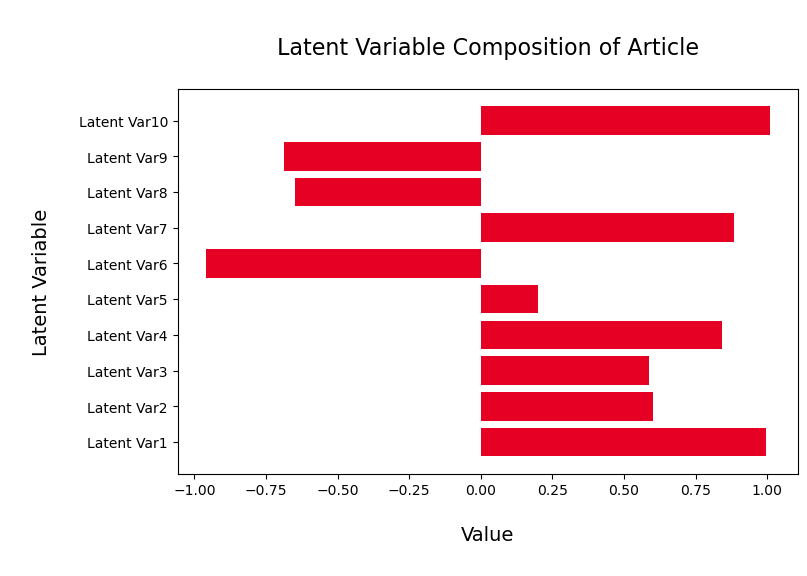

In [75]:
hm_red = '#E60024'

#Visualizing the composition of latent variables for the first article in a dataset:

first_article = A[:, 0]
plt.figure(figsize=(8, 5))
plt.barh([f'Latent Var{i}' for i in range(1,len(first_article)+1)], first_article, color=hm_red)
plt.title("\n Latent Variable Composition of Article \n", fontsize=16)
plt.ylabel("\nLatent Variable\n", fontsize=14)
plt.xlabel("\nValue\n", fontsize=14)
plt.show()


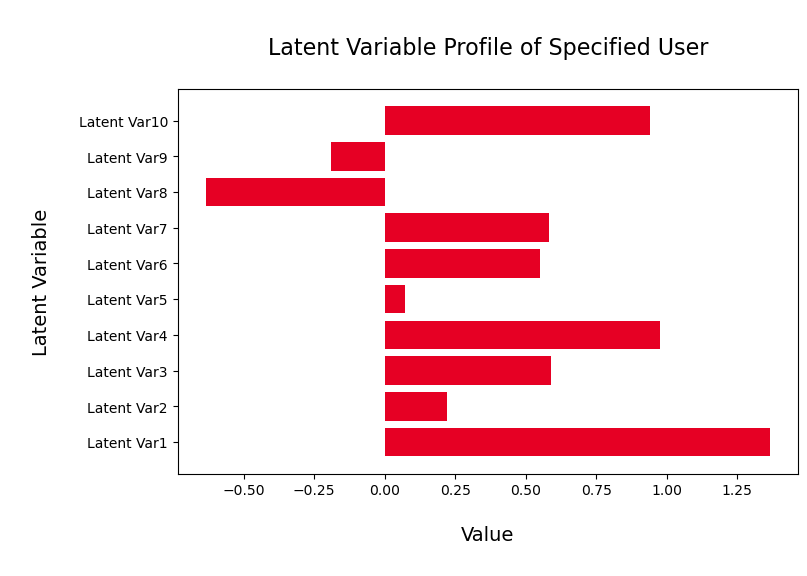

In [81]:
#Visualizing the composition of latent variables for the specified user in a dataset:

plt.figure(figsize=(8, 5))
plt.barh([f'Latent Var{i}' for i in range(1, len(first_article) + 1)], user_profile, color=hm_red)
plt.title("\nLatent Variable Profile of Specified User\n", fontsize=16)
plt.ylabel("\nLatent Variable\n", fontsize=14)
plt.xlabel("\nValue\n", fontsize=14)
plt.show()

**Analysis of Latent Variable Graphs:**

Latent variables reveal hidden patterns in data, capturing underlying factors of user preferences and product features. For the visualizations above it can be noted that:

Latent Variable Profile of Specified User:
- High Association: Strongest with Latent Var4.
- Negative Association: Notable in Latent Var8 and Latent Var10.

Latent Variable Composition of Article:
- High Association: Strongest with Latent Var10 and Latent Var7.
- Negative Association: Notable in Latent Var6.



In [79]:
inner_article_id = my_train_dataset.to_inner_iid(908728003) # find the inner representation of item 1
article_profile = A[:, inner_article_id]
article_profile

array([ 0.47064436,  0.17001888,  0.36995658,  1.06363396,  0.50306082,
        0.46911239,  1.26681008, -0.94268352, -1.40568899, -0.02813452])

In [77]:
inner_user_id = my_train_dataset.to_inner_uid('0effafce7faba321dc67d72f01a88c09b6336452471953637f9cb94f0a4161c2') # find the inner representation of user 1
user_profile = C[inner_user_id]
user_profile

array([ 1.36465212,  0.22013641,  0.5888701 ,  0.97588354,  0.07368349,
        0.55224162,  0.58238074, -0.63331187, -0.19028625,  0.94217636])

___
#### **Evaluating the Recommendation System: MSE, RMSE, and MAE**

In our recommendation system, RMSE, MSE, MAE, and FCP  are crucial metrics for evaluating the accuracy of predicted ratings:

- **RMSE (Root Mean Squared Error)** 
- **MSE (Mean Squared Error)** 
- **MAE (Mean Absolute Error)**
- **FCP (Fraction of Concordant Pairs)** 

Using these metrics, we can assess and improve the performance of our recommendation system, ensuring it provides accurate and reliable recommendations.

In [ ]:
my_train_dataset, my_test_dataset = train_test_split(my_dataset, test_size=0.5)

predictions = my_algorithm.test(my_test_dataset)

In [48]:
#RMSE (Root Mean Squared Error):

RMSE = accuracy.rmse(predictions, verbose=False)
print(f'The RMSE is {RMSE}')

The RMSE is 0.17172221975260815


In [49]:
#MSE (Mean Squared Error):

MSE = accuracy.mse(predictions, verbose=False)
print(f'The MSE is {MSE}')

The MSE is 0.029488520756763045


In [50]:
#MAE (Mean Absolute Error):

MAE = accuracy.mae(predictions, verbose=False)
print(f'The MAE is {MAE}')

The MAE is 0.09135004797008517


In [51]:
# FCP - Fraction of Concordant Pairs, the fraction of pairs whose relative ranking order is correct

FCP = accuracy.fcp(predictions, verbose=False)
print(f'The FCP is {FCP}')

The FCP is 0.7124209541674819


 **Model Evaluation**

1. Root Mean Squared Error (RMSE): 0.1713
- RMSE measures the average magnitude of the errors between the predicted and actual values. A lower RMSE indicates a better fit of the model to the data.
- In this case, an RMSE of 0.1713 suggests that, on average, the predicted ratings deviate by approximately 0.1713 from the actual ratings. This relatively low value indicates that the recommendation system is performing quite well in terms of prediction accuracy.

2. Mean Squared Error (MSE): 0.0293
- MSE is the average of the squared differences between the predicted and actual values, which penalizes larger errors more due to the squaring.
- An MSE of 0.0293 indicates that the squared differences between predicted and actual ratings are low, reinforcing that the model predictions are close to the actual ratings.

3. Mean Absolute Error (MAE): 0.0912

- MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It is the average of the absolute differences between predicted and actual values.
- An MAE of 0.0912 suggests that, on average, the predicted ratings are off by about 0.0912 from the actual ratings. This low value indicates that the model's predictions are generally accurate.

4. Fraction of Concordant Pairs (FCP): 0.6359
- FCP measures the proportion of correctly ordered pairs among all pairs of items. In a recommendation system, it evaluates how well the model ranks items for a given user.
- An FCP of 0.6359 means that 63.59% of the time, the model correctly ranks pairs of items in the same order as the actual ratings. This score indicates a reasonable level of ranking accuracy, suggesting that the system is relatively good at ordering items in a way that aligns with user preferences.


Overall, the low RMSE, MSE, and MAE values indicate that the recommendation system's predictions are quite close to the actual ratings, reflecting high accuracy. The FCP value shows that the system is fairly good at ranking items correctly according to user preferences, though there might still be room for improvement.

___

### **Final Remarks**

In this notebook, we developed further personalized fashion recommendation system using matrix factorization techniques. By using the Surprise library and the FunkSVD algorithm, we were able to create a model that provides tailored product suggestions to individual customers.
___

Recommended Articles:

Article ID: 538699007, Product Name: V-neck strap top


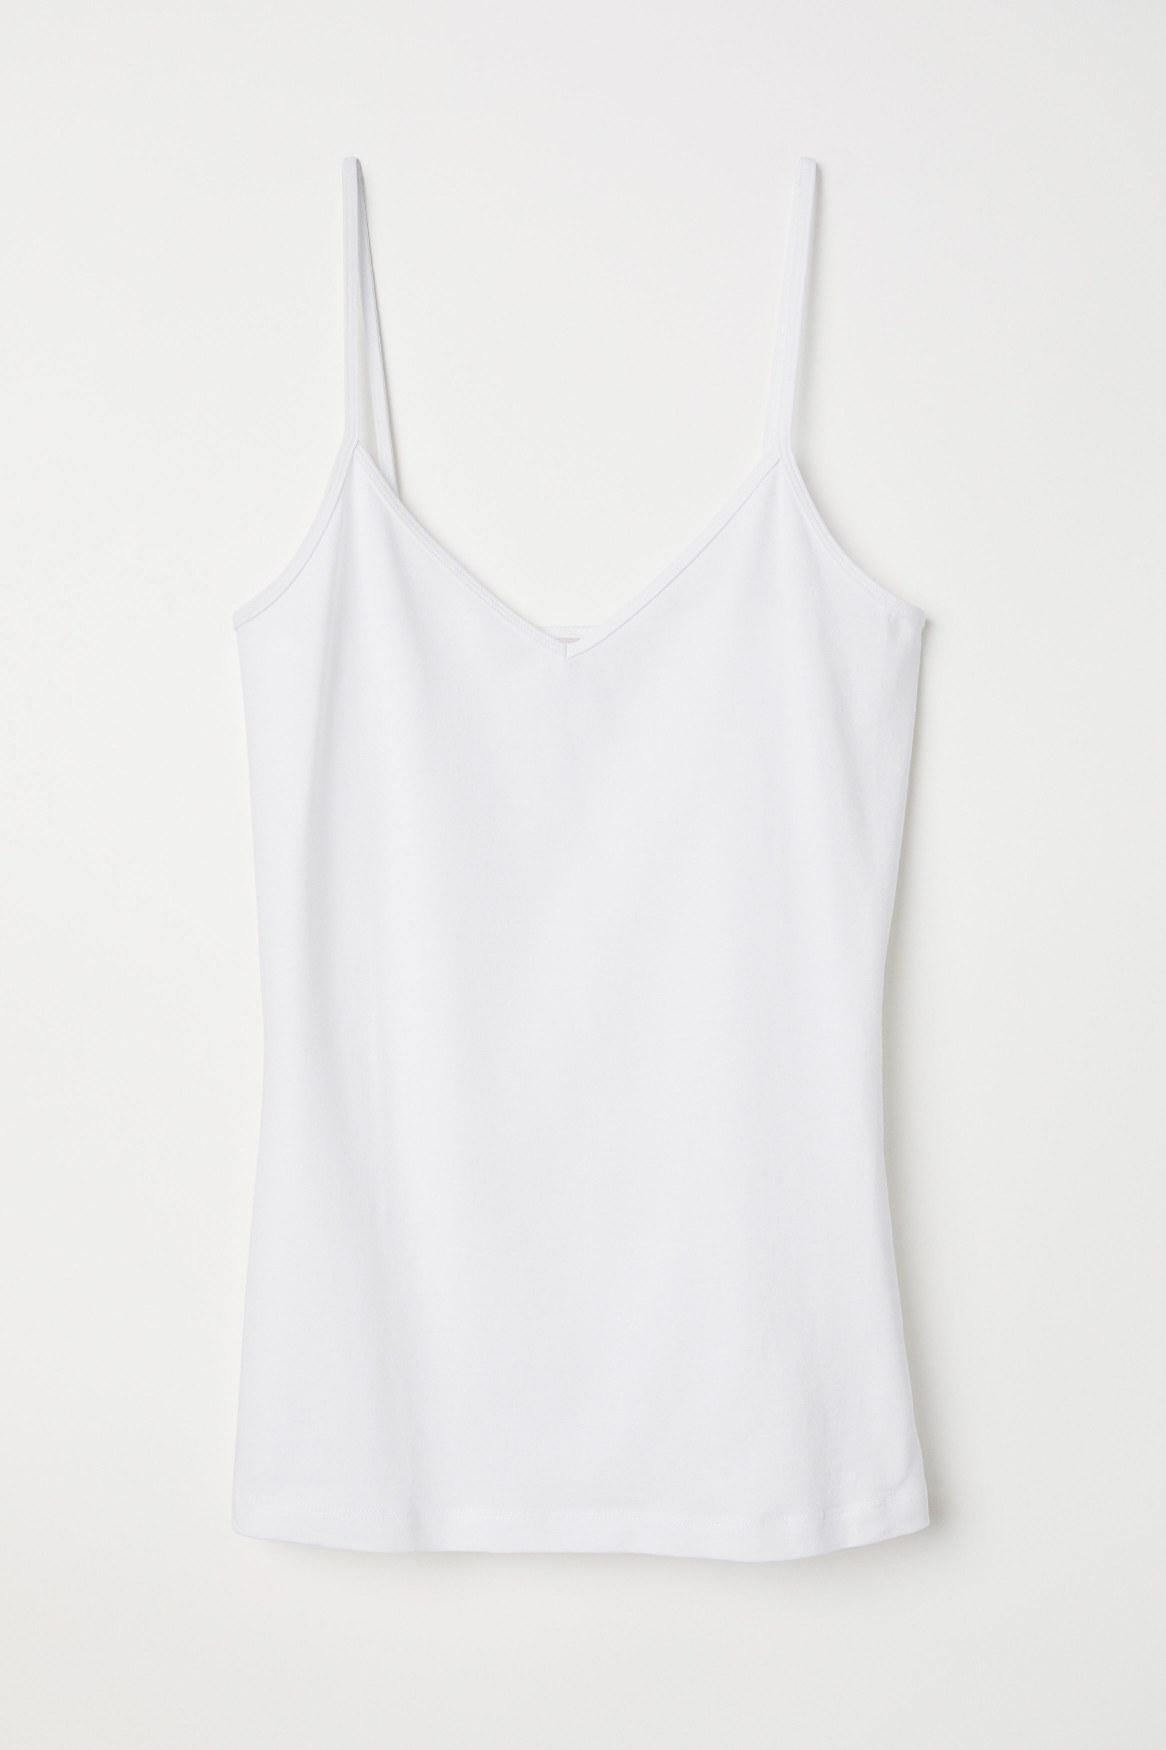

Article ID: 876009004, Product Name: Nat ls cord


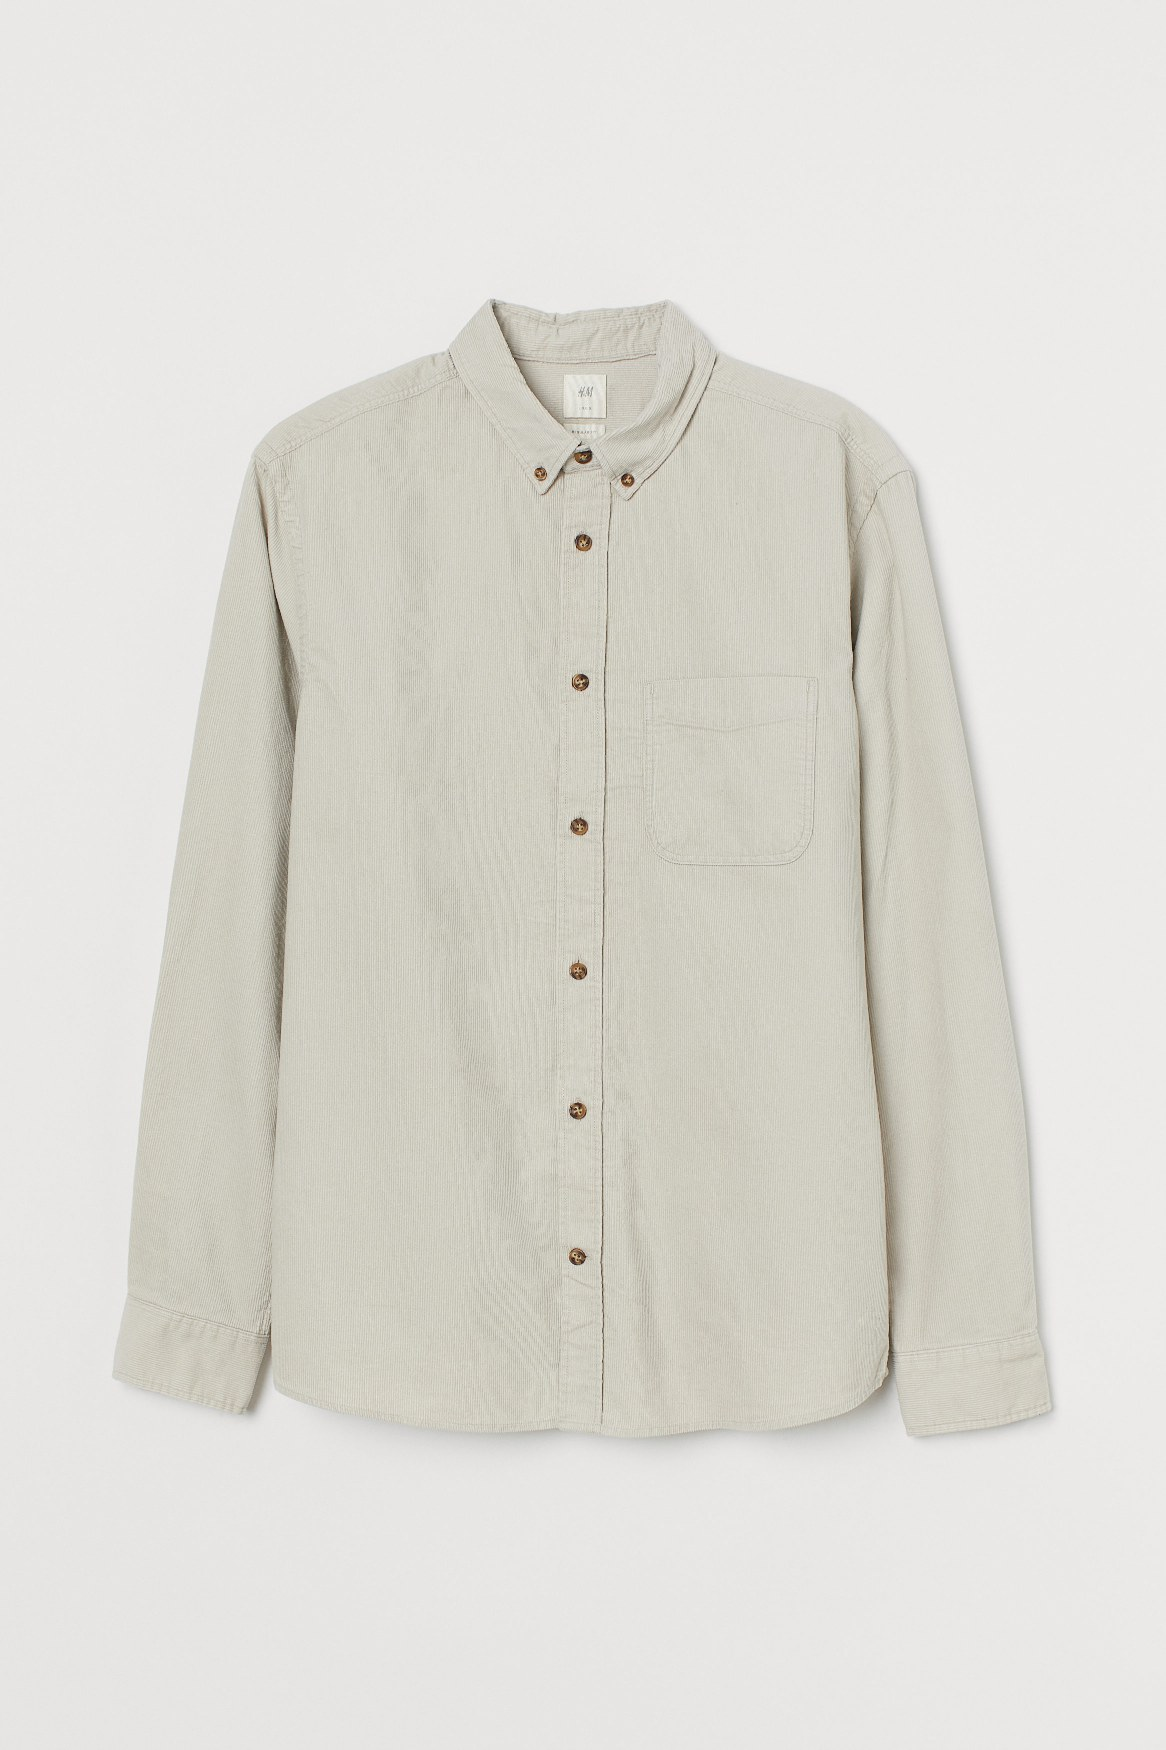

Article ID: 833534001, Product Name: MC Cairn Tweed Jacket


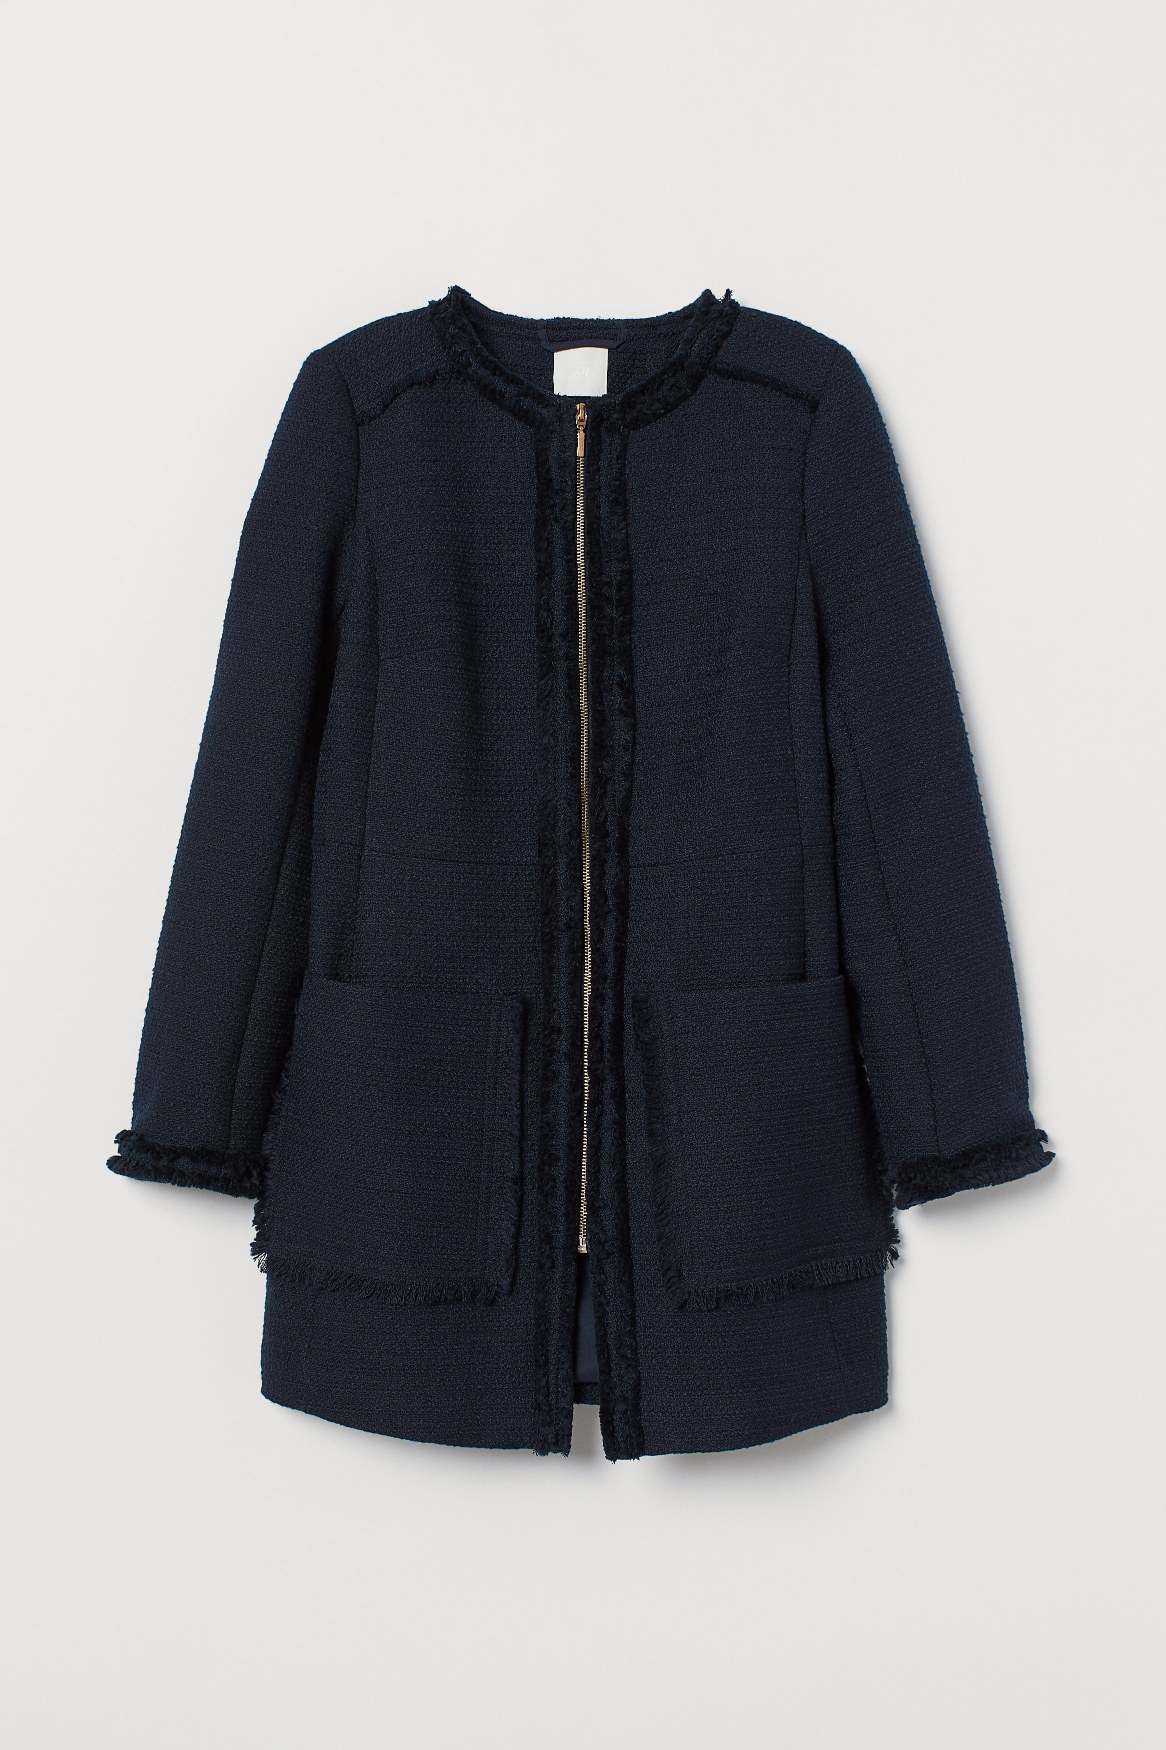

Article ID: 856270003, Product Name: Bounce seamless Cropped LS


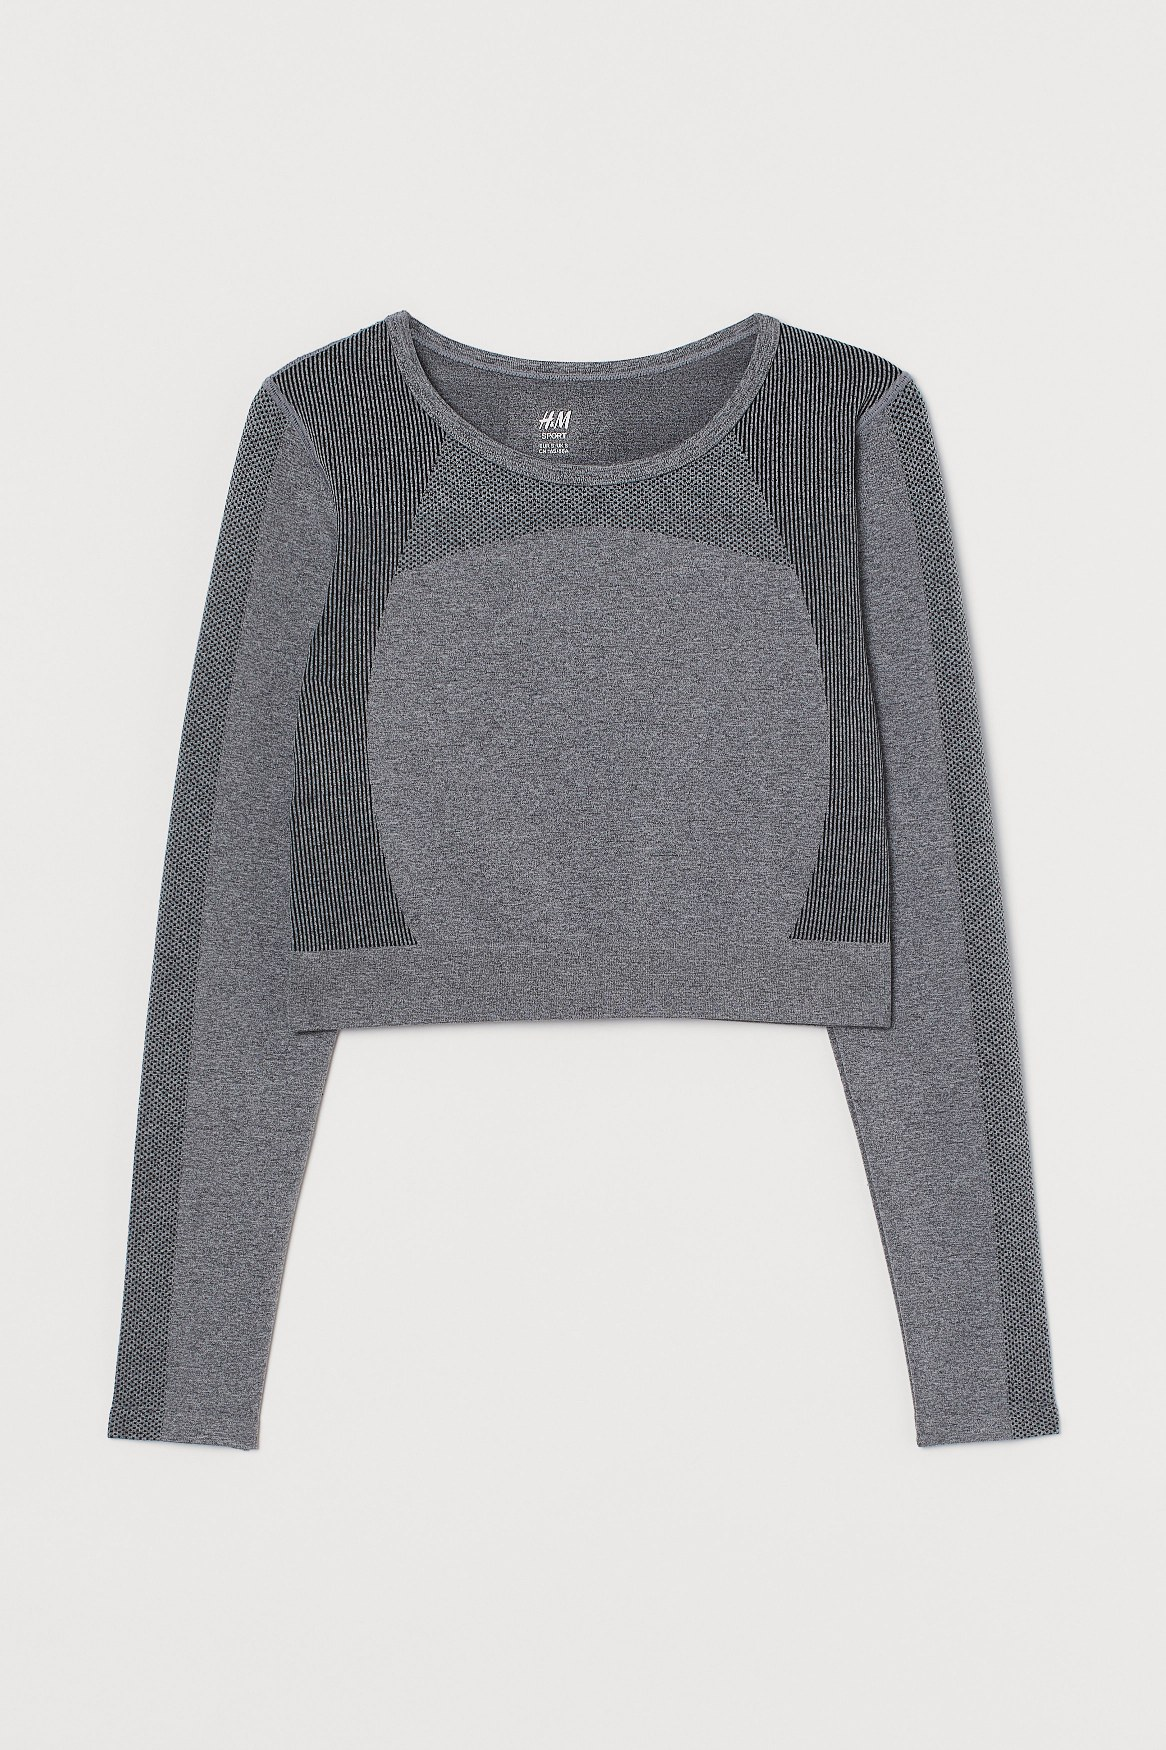

Article ID: 906226001, Product Name: Squared top


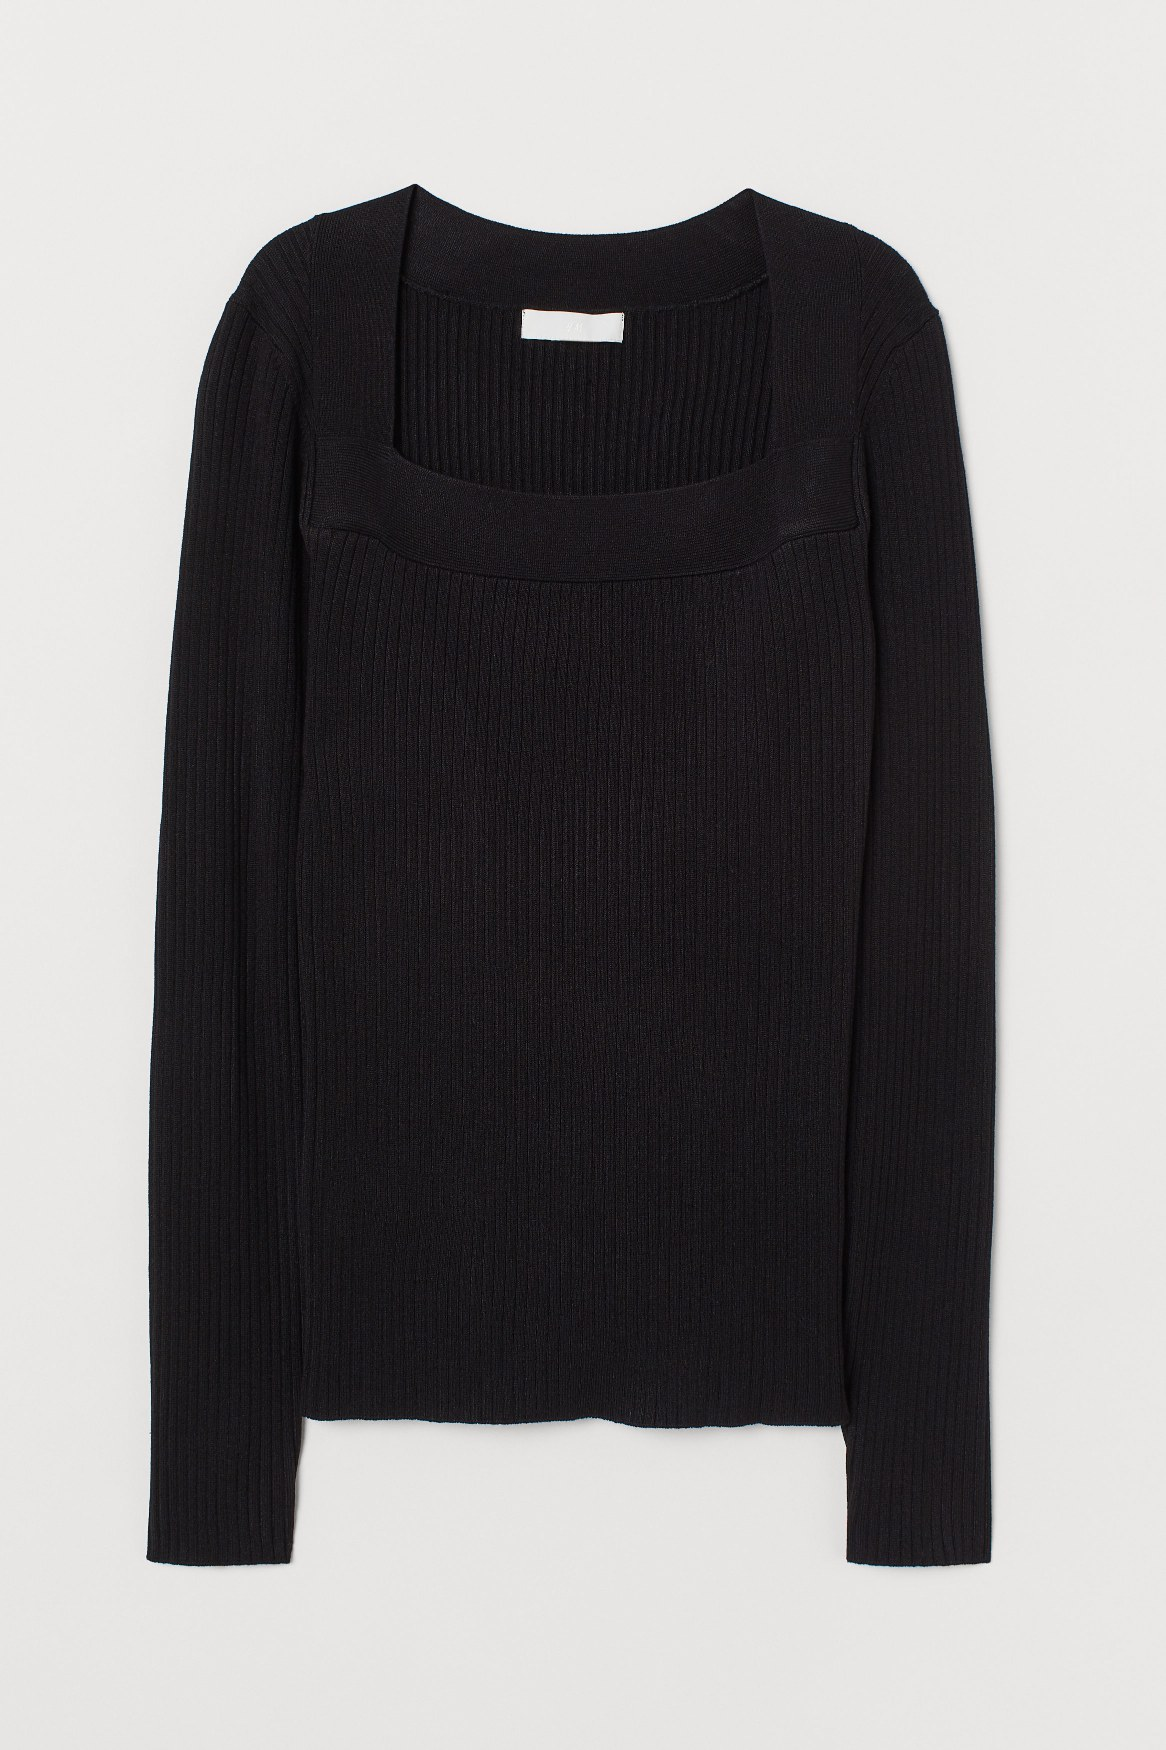

In [141]:
# For presentation and displaying work purposes:

def display_image(image_path, width=100):
    
    display(Image(filename=image_path, width=width))

def predict_scores_and_display_images_for_customer(customer_id, customer_id_mapping, A, articles_df, images_path, top_n=5):
    """
    Predict scores for a specified customer based on their customer_id and display images of top articles.

    Parameters:
    customer_id (int): The ID of the customer to predict scores for.
    customer_id_mapping (pd.Series): A series mapping customer_id to the row index in matrix C.
    A : Matrix containing article information.
    articles_df: df containing article details including 'article_id' and 'prod_name'.
    images_path (str): The directory path where article images are stored.
    top_n (int): Number of top articles to display. Default is 5.
    """
    #Getting the row index for the specified customer_id
    customer_row_index = customer_id_mapping.get(customer_id)
    
    if customer_row_index is None:
        print(f"Customer ID {customer_id} not found in the mapping.")
        return
    
    #Predicting the scores for the specified customer:
    predicted_scores = np.clip(np.dot(C[customer_row_index, :], A), a_min=0, a_max=5)
    
    #Creating a DataFrame with the predicted scores:
    df_predicted = pd.DataFrame({'article_id': mm_df['article_id'].unique(), 'predicted_score': predicted_scores})
    
    #Getting the top articles:
    top_articles = df_predicted.sort_values(by='predicted_score', ascending=False).head(top_n)
    
    #merging with article details to get product names:
    recommended_articles = pd.merge(top_articles, articles_df[['article_id', 'prod_name']], on='article_id')
    
    #Printing top articles:
    print("Recommended Articles:\n")
    for index, row in recommended_articles.iterrows():
        article_id = row['article_id']
        prod_name = row['prod_name']
        
        #Getting the folder and image name:
        folder = '0' + str(article_id)[:2]
        image_name = '0' + str(article_id) + '.jpg'
        image_path = os.path.join(images_path, folder, image_name)
        
        print(f"Article ID: {article_id}, Product Name: {prod_name}")
        
        #Checking if the image exists:
        if os.path.exists(image_path):
            display_image(image_path, width=200)
        else:
            print(f"Image for Article ID: {article_id} not found.")



In [ ]:
#Sanity check:

customer_id_mapping = pd.Series(data=range(len(C)), index=mm_df['customer_id'].unique())  # Assuming 'customer_id' corresponds to rows in C
customer_id = '0efc7abe48c4111b1386bc7f122aacdc291af2c31541609c488a38d7383d6ed0'  # Replace with the actual customer_id you want to predict for
images_path = '/Users/Atoosa/Desktop/data/hm/images'


predict_scores_and_display_images_for_customer(customer_id, customer_id_mapping, A, articles_df, images_path)


In [123]:
#Sanity Check: 

pd.set_option('display.max_colwidth', None)

R_df.head()

,customer_id,article_id,unit_number
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,794321007,1
1,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d8cd0c725276a467a2a,448509014,1
2,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d8cd0c725276a467a2a,719530003,1
3,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37e011580a479e80aa94,734592001,1
4,0002cca4cc68601e894ab62839428e5f0696417fe0f9e84551c6827a7629d441,910601002,1


In order to analyze our model we will review prior purchases of this specific customer. 

In [139]:
#Specified customer_id:

specific_customer_id = '0efc7abe48c4111b1386bc7f122aacdc291af2c31541609c488a38d7383d6ed0'

customer_purchases = R_df[R_df['customer_id'] == specific_customer_id]

#Printing prior purchases:

print(f"Purchases for customer_id {specific_customer_id}:")
customer_purchases

Purchases for customer_id 0efc7abe48c4111b1386bc7f122aacdc291af2c31541609c488a38d7383d6ed0:


,customer_id,article_id,unit_number
27943,0efc7abe48c4111b1386bc7f122aacdc291af2c31541609c488a38d7383d6ed0,903487001,1
27944,0efc7abe48c4111b1386bc7f122aacdc291af2c31541609c488a38d7383d6ed0,915092002,2


Purchases for customer_id 0efc7abe48c4111b1386bc7f122aacdc291af2c31541609c488a38d7383d6ed0:
Article ID: 903487001, Product Name: Millo PQ Loafer


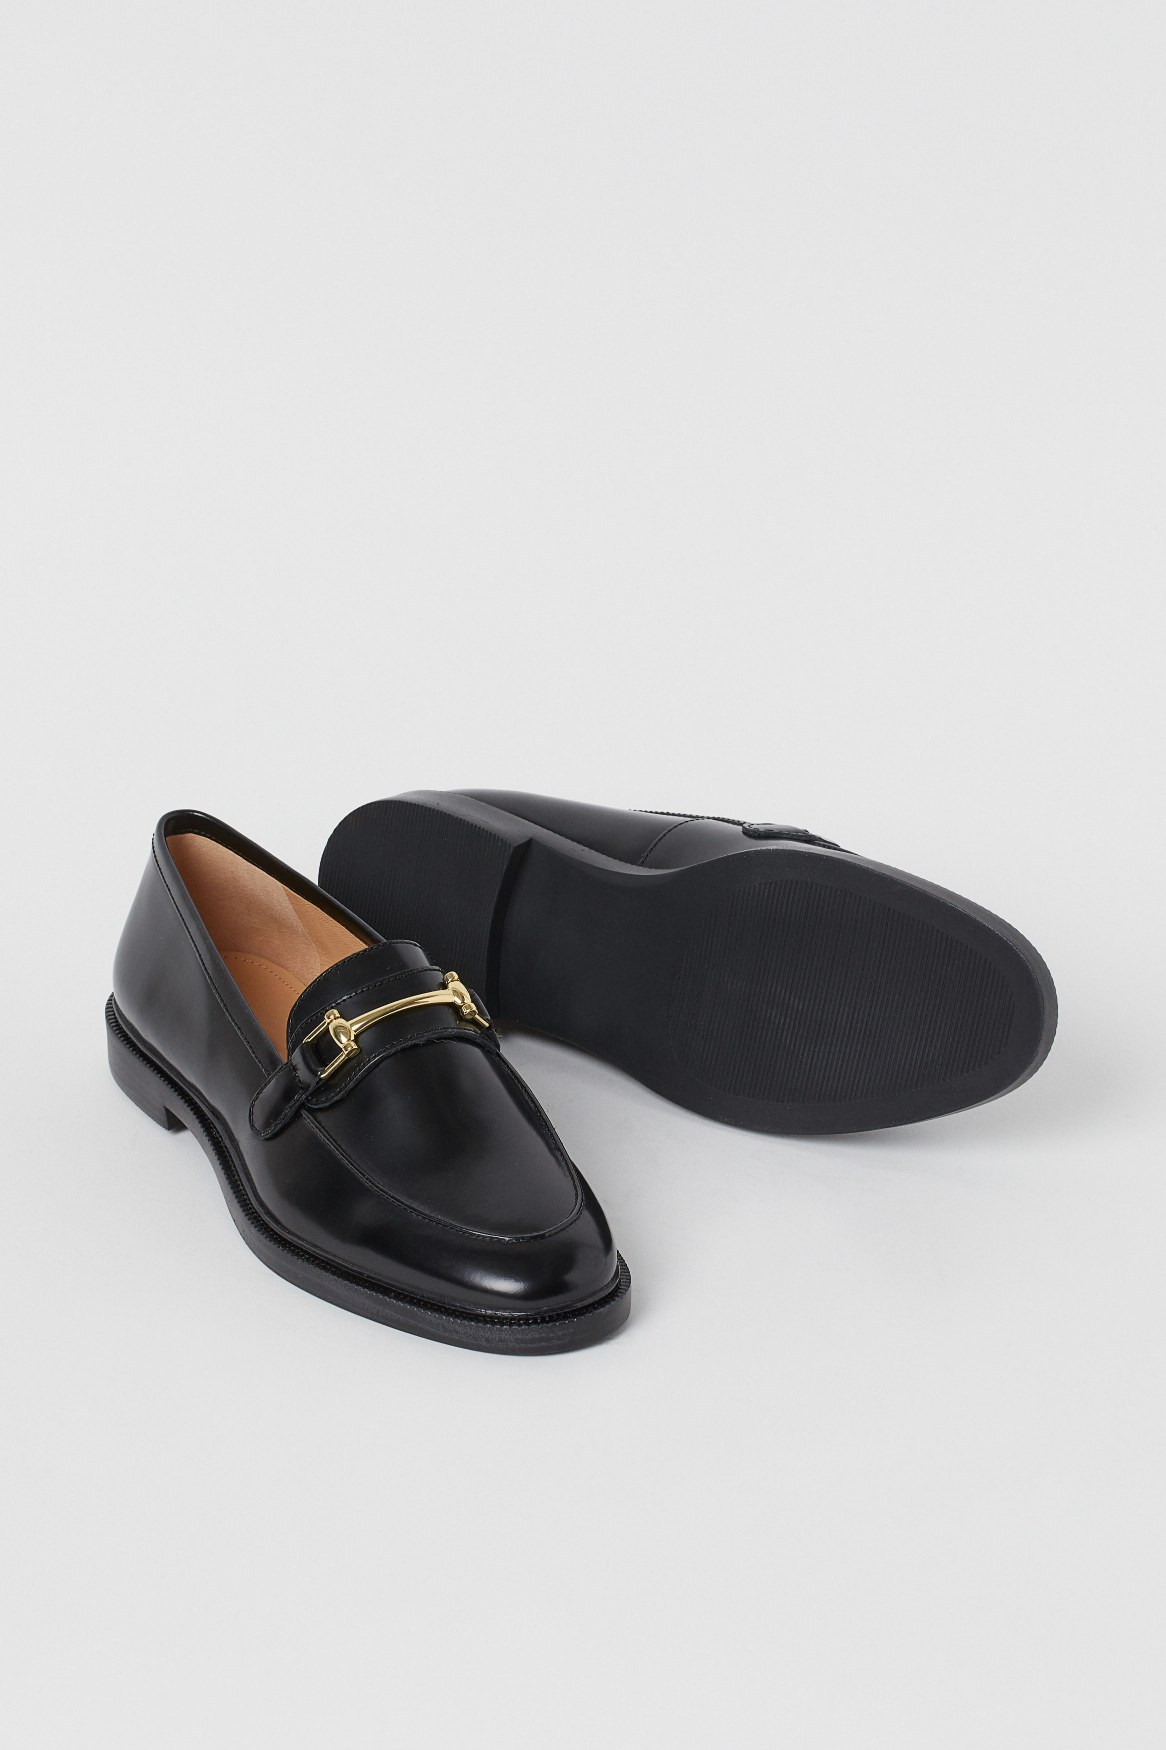

Article ID: 915092002, Product Name: PQ MEMPHIS WOOL SWEATER


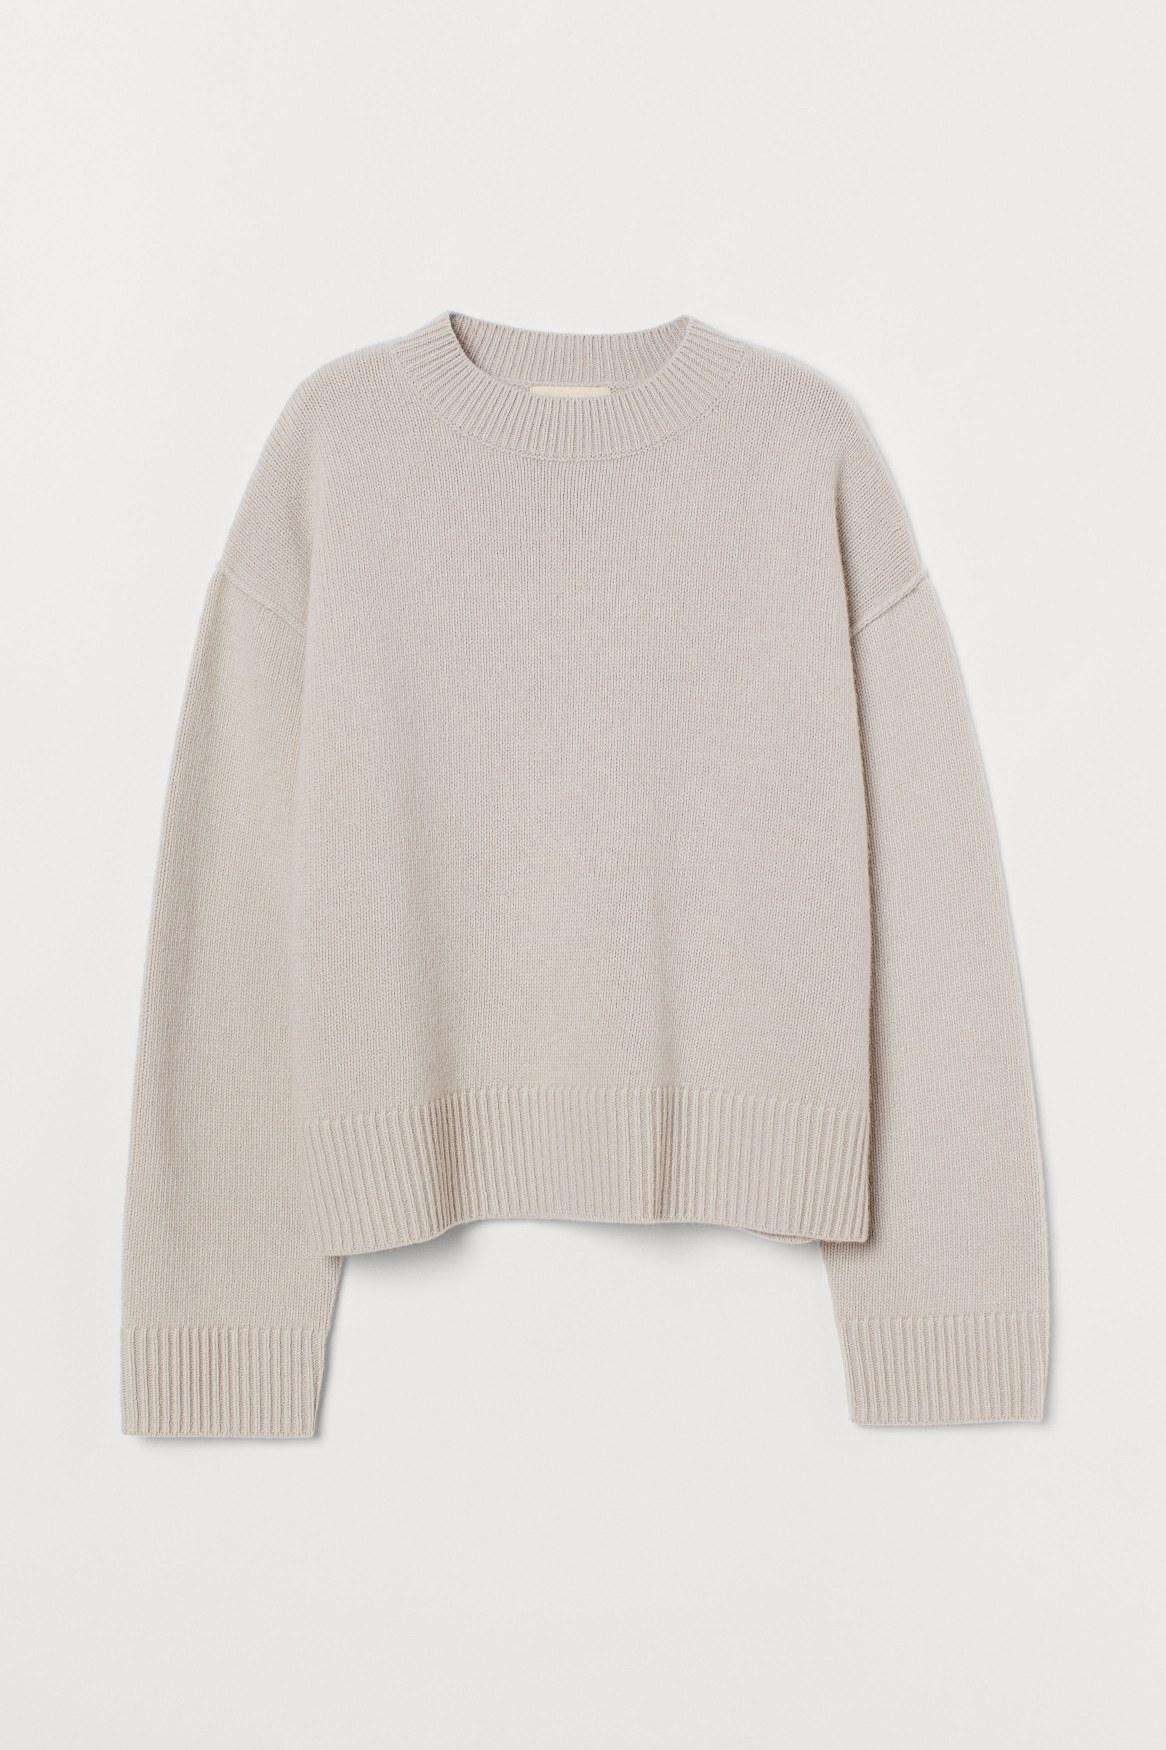

In [140]:
#Displaying the pictures of the previous purchases:
print(f"Purchases for customer_id {specific_customer_id}:")

for index, row in customer_purchases.iterrows():
    article_id = row['article_id']
    
    # Getting the product name from articles_df
    prod_name = articles_df[articles_df['article_id'] == article_id]['prod_name'].values[0]
    
    # Generating the folder and image name
    folder = '0' + str(article_id)[:2]
    image_name = '0' + str(article_id) + '.jpg'
    image_path = os.path.join(images_path, folder, image_name)
    
    print(f"Article ID: {article_id}, Product Name: {prod_name}")
    
    #Checking if the image exists
    if os.path.exists(image_path):
        display_image(image_path, width=300)
    else:
        print(f"Image for Article ID: {article_id} not found.")